In [ ]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

from gaiaunlimited.selectionfunctions import DR3SelectionFunctionTCG
from gaiaunlimited.utils import get_healpix_centers


In [ ]:
MG_step = 0.1
MG_bins = np.arange(-5,18+MG_step,MG_step) 
MG_bins_c = np.round(MG_bins[:-1] + MG_step/2,1)

mG_up = 7
mG_low = 17

r_sphere = 60 # pc

d_lim = {str(mag):[0,r_sphere] for mag in MG_bins_c}

d_step = 1
d_bins = np.arange(d_step, r_sphere+d_step, d_step)

In [69]:
mG = np.zeros((len(d_bins), len(MG_bins_c)))

for i in range(len(MG_bins_c)):
    for k in range(len(d_bins)):
        mG[k, i] = MG_bins_c[i] + 5*np.log10(d_bins[k]/10)  


MG1, MG2 = [], []
for k in range(len(d_bins)):
    i1 = np.where(mG[k, :] < mG_up)[0]
    i2 = np.where(mG[k, :] > mG_low)[0]

    MG1.append(MG_bins_c[i1][-1])

    if len(i2) > 0:
        MG2.append(MG_bins_c[i2][0])
    else:
        MG2.append(None)


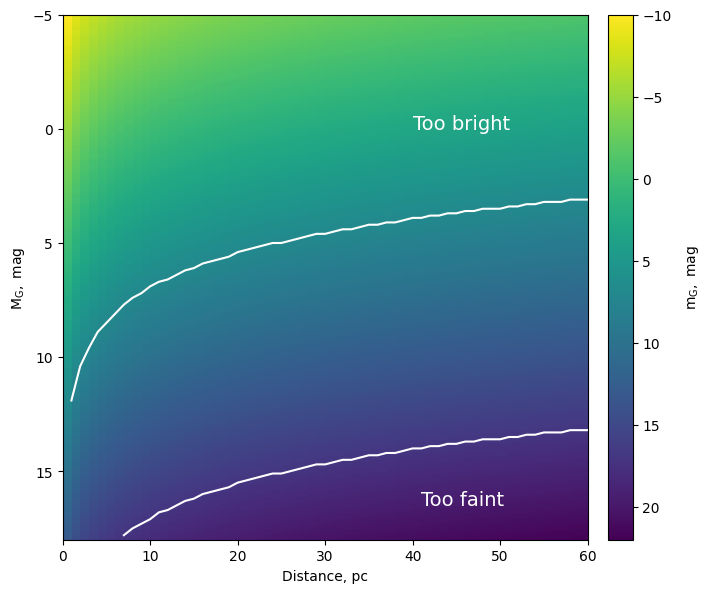

In [57]:
fig, ax = plt.subplots(figsize=(10, 7))

im = ax.imshow(mG.T,interpolation='none',extent=[0,r_sphere,18,-5],cmap='viridis_r',vmin=-10,vmax=22)
ax.plot(d_bins, MG1, color='w', label='M_G < 7')
ax.plot(d_bins, MG2, color='w', label='M_G > 17')
ax.set_xlabel('Distance, pc')   
ax.set_ylabel(r'$\mathrm{M_G, \ mag}$')
ax.set_aspect((r_sphere)/(18+5))
ax.text(41,16.5,'Too faint',fontsize=14,color='w')
ax.text(40,0,'Too bright',fontsize=14,color='w')

fig.subplots_adjust(bottom=0.18,left=0.08,right=0.94,top=0.93)
pos = ax.get_position()
cax = fig.add_axes([pos.x0+pos.width+0.02,pos.y0,0.025,pos.height])
cbar = fig.colorbar(im,cax=cax,orientation='vertical')
cbar.set_label(r'$\mathrm{m_{G}, \ mag}$',labelpad=10)
cax.invert_yaxis()
                       

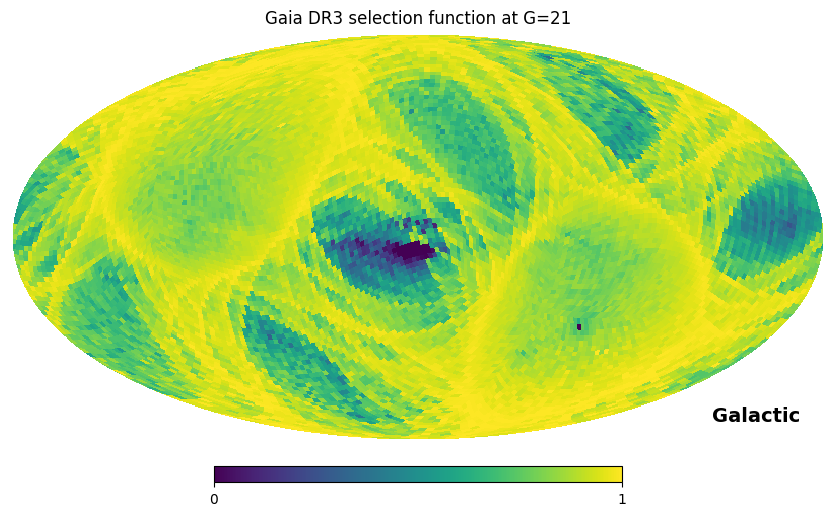

In [83]:


mapHpx7 = DR3SelectionFunctionTCG()
coords_of_centers = get_healpix_centers(5)
gmag = np.ones_like(coords_of_centers) * 20.9
completeness = mapHpx7.query(coords_of_centers,gmag)
hp.mollview(completeness,coord=['Celestial','Galactic'],
            title='Gaia DR3 selection function at G=21',
            min=0,max=1)

In [ ]:
mG_step = 0.1
mG_bins = np.arange(-11, 22 + mG_step,mG_step)
mG_mean_completeness = []

for mag in mG_bins:
    gmag = np.ones_like(coords_of_centers) * mag
    completeness = mapHpx7.query(coords_of_centers, gmag)
    mG_mean_completeness.append(np.mean(completeness))


In [85]:
completeness = np.zeros((len(d_bins), len(MG_bins_c)))

for i in range(len(MG_bins_c)):
    for k in range(len(d_bins)):
        ind = np.argmin(np.abs(mG_bins - mG[k, i]))
        completeness[k, i] = mG_mean_completeness[ind]


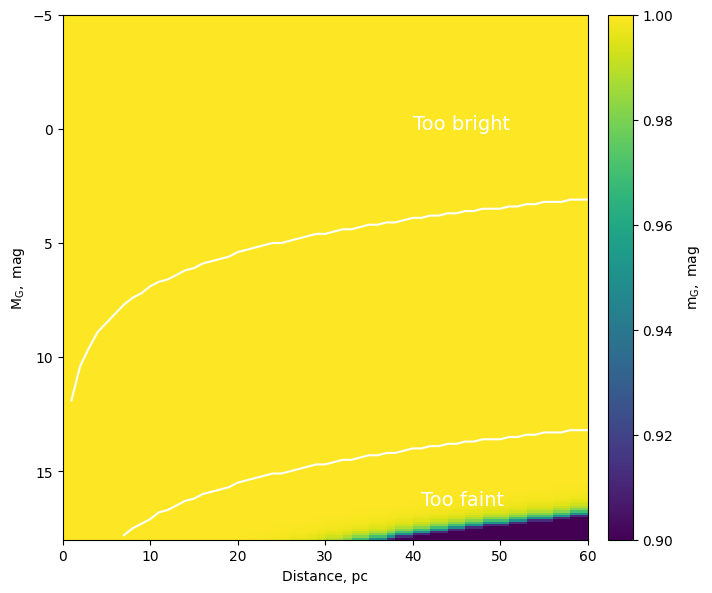

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

im = ax.imshow(completeness.T,interpolation='none',extent=[0,r_sphere,18,-5],cmap='viridis',vmin=0.9,vmax=1)
ax.plot(d_bins, MG1, color='w', label='M_G < 7')
ax.plot(d_bins, MG2, color='w', label='M_G > 17')
ax.set_xlabel('Distance, pc')   
ax.set_ylabel(r'$\mathrm{M_G, \ mag}$')
ax.set_aspect((r_sphere)/(18+5))
ax.text(41,16.5,'Too faint',fontsize=14,color='w')
ax.text(40,0,'Too bright',fontsize=14,color='w')

fig.subplots_adjust(bottom=0.18,left=0.08,right=0.94,top=0.93)
pos = ax.get_position()
cax = fig.add_axes([pos.x0+pos.width+0.02,pos.y0,0.025,pos.height])
cbar = fig.colorbar(im,cax=cax,orientation='vertical')
cbar.set_label(r'$\mathrm{Completeness}$',labelpad=10)
